# 대중 리뷰 키워드 분석

In [2]:
# pip install kagglehub
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# print("Path to dataset files:", path)
# dataset 파일 루트를 ipynb와 동일하게 옮겨오기

In [3]:
import re
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

tqdm.pandas()

# 전처리 함수
def preprocess_text(text):
    text_no_html = BeautifulSoup(text, "html.parser").get_text()
    expanded_text = contractions.fix(text_no_html)
    text_no_specials = re.sub(r'[^a-zA-Z]', ' ', expanded_text)
    text_clean = re.sub(r'\s+', ' ', text_no_specials).strip()
    text_lower = text_clean.lower()
    tokens = word_tokenize(text_lower)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

# 데이터 불러오기
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# 결측치 제거
# df.dropna(subset=['review'], inplace=True)

# 전처리 함수 적용 (주의: 약 60분 소요)
# df_copy = df.copy()
# df_copy['cleaned_review'] = df_copy['review'].progress_apply(preprocess_text)
# df_copy.to_csv("cleaned_imdb_reviews.csv", index=False, encoding='utf-8-sig')

In [5]:
# 따로 저장해둔걸로 실행 (위와 둘중 하나 주석처리석처리)
df_copy = pd.read_csv("cleaned_imdb_reviews.csv")

pd.set_option('display.max_colwidth', 200)

# positive와 negative 나누기
df_pos = df_copy[df['sentiment'] == 'positive'][['sentiment', 'review', 'cleaned_review']]
df_neg = df_copy[df['sentiment'] == 'negative'][['sentiment', 'review', 'cleaned_review']]
df_pos.head()

,sentiment,review,cleaned_review
0,positive,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex viol...
1,positive,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamles...
2,positive,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint rea...
4,positive,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play t...
5,positive,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 o...",probabl time favorit movi stori selfless sacrific dedic nobl preachi bore never get old despit seen time last year paul luka perform bring tear eye bett davi one truli sympathet role delight kid g...


In [6]:
import pandas as pd
import nltk
from collections import Counter

ACCEPTED_POS = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')

# 명사, 형용사 필터링 함수
def filter_pos_adj(tokens):
    tagged = nltk.pos_tag(tokens)
    filtered = [word for word, pos in tagged if pos in ACCEPTED_POS]
    return filtered

# 단어 빈도 계산 함수
def get_filtered_word_freq(text_series):
    
    # 텍스트 합치고 토큰화
    tokens = ' '.join(text_series).split()

    # 품사 필터링
    filtered_tokens = filter_pos_adj(tokens)

    # 단어 빈도 계산
    word_counts = Counter(filtered_tokens)

    # DataFrame 변환 후 빈도 내림차순 정렬
    df_freq = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
    df_freq_sorted = df_freq.sort_values(by='Frequency', ascending=False)

    return df_freq_sorted.head(30), word_counts


In [7]:
# 긍정 빈도 정렬
df_pos_freq, pos_word_counts = get_filtered_word_freq(df_pos["cleaned_review"])
print("Positive reviews top keywords:\n", df_pos_freq)

Positive reviews top keywords:
          Word  Frequency
107      film      50878
214      movi      40304
111      time      16624
258      good      15142
167   charact      13740
135     great      13124
277     stori      11146
2       watch      11127
9       scene       9839
13       show       8931
154       way       8914
423    realli       8400
778       end       8353
137      life       8147
217     peopl       7958
182      year       7819
143      play       7702
510      much       7292
252      best       7290
274      work       7258
6       thing       7038
352       man       6817
257       act       6599
46       mani       6524
286   perform       6254
119     actor       6207
181      love       5603
105     littl       5545
241      look       5512
1009     part       5368


In [8]:
# 부정 빈도 정렬
df_neg_freq, neg_word_counts = get_filtered_word_freq(df_neg["cleaned_review"])
print("Negative reviews top keywords:\n", df_neg_freq)

Negative reviews top keywords:
           Word  Frequency
10        movi      52484
19        film      44975
9         time      15329
57         bad      14778
284       good      14545
131    charact      14020
30       watch      12776
141      scene      11115
92         act      10132
244     realli       9771
45       thing       9470
105        end       8795
183      stori       8765
200      peopl       8587
170       plot       8509
88         way       8456
100       look       8051
166       much       7633
438      actor       7154
37        show       7111
136        tri       6598
122     actual       5938
190       work       5818
876        guy       5679
98        play       5559
43        year       5428
1068  director       5427
521      great       5271
1020       man       5123
2        littl       5110


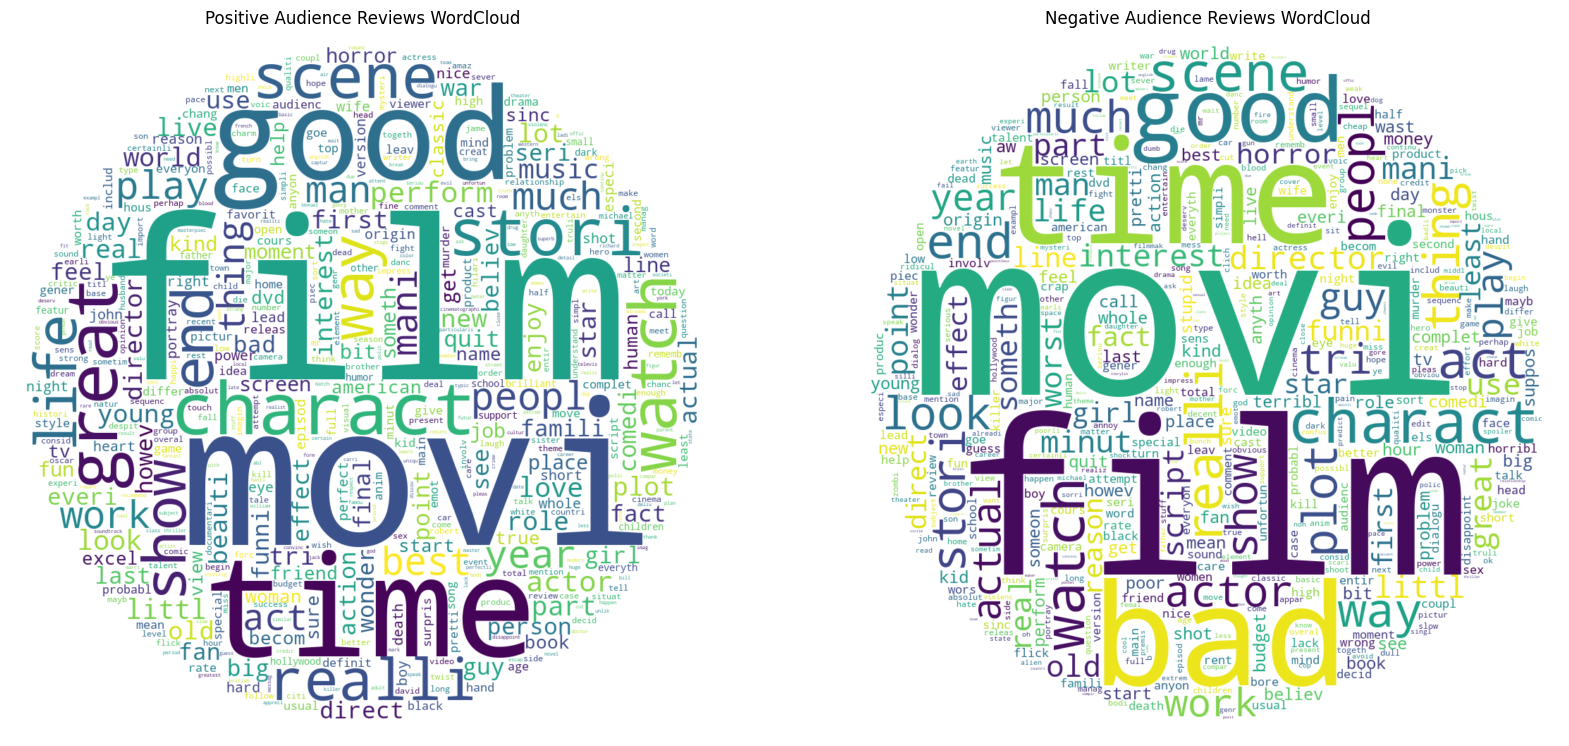

In [9]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 마스크 생성 (원형)
x, y = np.ogrid[:1000, :1000]
mask = (x - 500) ** 2 + (y - 500) ** 2 > 480 ** 2
mask = 255 * mask.astype(int)

# 워드클라우드 생성 함수
def create_wordcloud(word_counts, mask):
    return WordCloud(
        width=1000,
        height=1000,
        max_words=500,
        mask=mask,
        background_color='white'
    ).generate_from_frequencies(word_counts)

pos_wordcloud = create_wordcloud(pos_word_counts, mask)
neg_wordcloud = create_wordcloud(neg_word_counts, mask)

# 플롯 생성 - 1행 2열
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# 긍정 워드클라우드
axs[0].imshow(pos_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Positive Audience Reviews WordCloud')

# 부정 워드클라우드
axs[1].imshow(neg_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Negative Audience Reviews WordCloud')

plt.show()

In [10]:
from gensim import corpora

# 각 리뷰를 단어 단위로 나눔 (문서 단위 토큰화)
tokenized_pos_doc = df_pos['cleaned_review'].apply(lambda x: x.split())
tokenized_neg_doc = df_neg['cleaned_review'].apply(lambda x: x.split())

# 필터링 적용
tokenized_pos_doc = tokenized_pos_doc.apply(filter_pos_adj)
tokenized_neg_doc = tokenized_neg_doc.apply(filter_pos_adj)

# 각 단어에 고유 ID를 부여 (사전 생성)
pos_dictionary = corpora.Dictionary(tokenized_pos_doc)
neg_dictionary = corpora.Dictionary(tokenized_neg_doc)

# 각 문서를 "단어 ID + 단어 개수" 형식으로 변환
pos_corpus = [pos_dictionary.doc2bow(text) for text in tokenized_pos_doc]
neg_corpus = [neg_dictionary.doc2bow(text) for text in tokenized_neg_doc]

In [11]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# 평가 함수
def evaluate_lda_model(tokenized_doc, dictionary, corpus, label):
    coherence_values = []
    perplexity_values = []

    for num_topics in range(2, 13, 2):
        model = LdaModel(corpus=corpus,
                         num_topics=num_topics,
                         id2word=dictionary,
                         passes=4,
                         alpha='symmetric',
                         eta='auto',
                         random_state=100)

        coherence_model = CoherenceModel(model=model,
                                         texts=tokenized_doc,
                                         dictionary=dictionary,
                                         coherence='c_v')
        
        coherence = coherence_model.get_coherence()
        log_perplexity = model.log_perplexity(corpus)
        perplexity = 2 ** (-log_perplexity)

        coherence_values.append(coherence)
        perplexity_values.append(perplexity)

        print(f"[{label}] num_topics={num_topics} | Coherence={coherence:.4f} | Perplexity={perplexity:.2f}")

    return {
        "coherence": coherence_values,
        "perplexity": perplexity_values
    }

# 시각화 함수
def plot_lda_metrics(result_dict, label=""):
    coherence = result_dict["coherence"]
    perplexity = result_dict["perplexity"]
    topics = range(2, 13, 2)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1행 2열

    # Coherence 그래프
    axes[0].plot(topics, coherence, marker='o', color='blue')
    axes[0].set_title(f'Coherence Score - {label}')
    axes[0].set_xlabel('Number of Topics')
    axes[0].set_ylabel('Coherence')
    axes[0].grid(True)

    # Perplexity 그래프
    axes[1].plot(topics, perplexity, marker='s', color='green')
    axes[1].set_title(f'Perplexity Score - {label}')
    axes[1].set_xlabel('Number of Topics')
    axes[1].set_ylabel('Perplexity')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


[POSITIVE] num_topics=2 | Coherence=0.3136 | Perplexity=286.08
[POSITIVE] num_topics=4 | Coherence=0.3165 | Perplexity=284.26
[POSITIVE] num_topics=6 | Coherence=0.3348 | Perplexity=293.60
[POSITIVE] num_topics=8 | Coherence=0.3541 | Perplexity=315.56
[POSITIVE] num_topics=10 | Coherence=0.3637 | Perplexity=363.72
[POSITIVE] num_topics=12 | Coherence=0.3970 | Perplexity=416.83


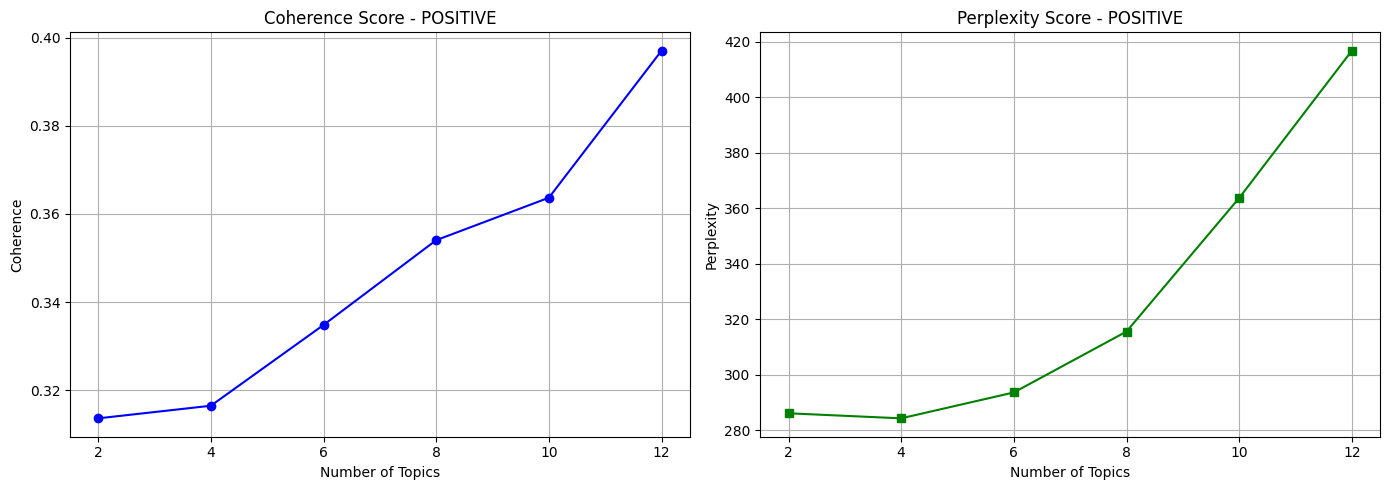

In [12]:
pos_results = evaluate_lda_model(tokenized_pos_doc, pos_dictionary, pos_corpus, label="POSITIVE")
plot_lda_metrics(pos_results, label="POSITIVE")

[NEGATIVE] num_topics=2 | Coherence=0.2946 | Perplexity=264.10
[NEGATIVE] num_topics=4 | Coherence=0.2952 | Perplexity=268.27
[NEGATIVE] num_topics=6 | Coherence=0.3121 | Perplexity=279.33
[NEGATIVE] num_topics=8 | Coherence=0.3409 | Perplexity=301.94
[NEGATIVE] num_topics=10 | Coherence=0.3923 | Perplexity=352.13
[NEGATIVE] num_topics=12 | Coherence=0.3796 | Perplexity=396.06


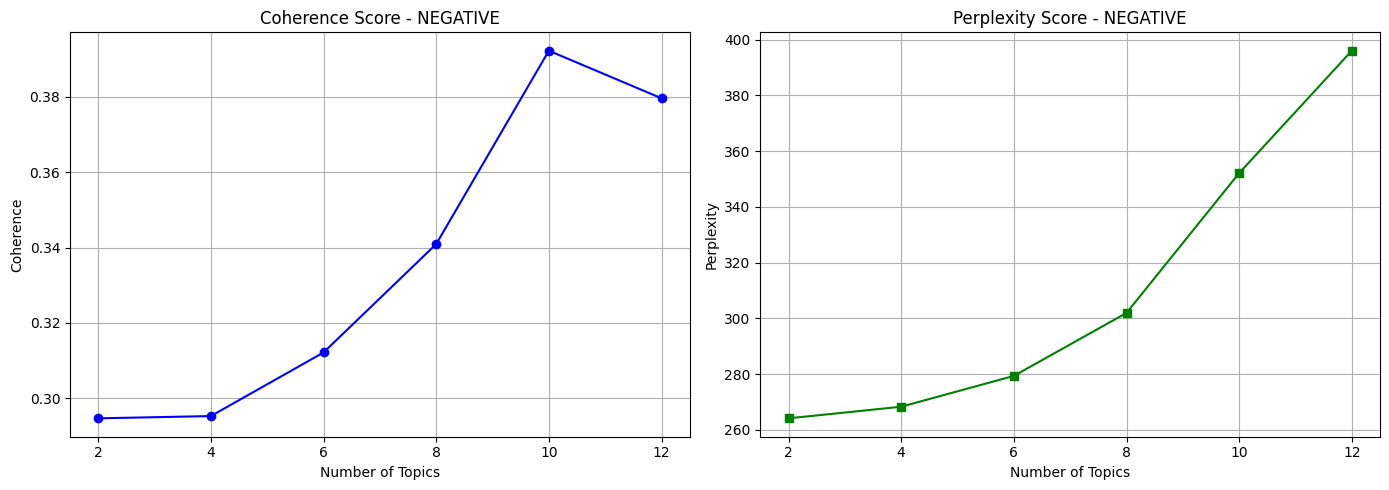

In [13]:
neg_results = evaluate_lda_model(tokenized_neg_doc, neg_dictionary, neg_corpus, label="NEGATIVE")
plot_lda_metrics(neg_results, label="NEGATIVE")

In [14]:
# 최종 토픽 수 지정
pos_num_topics = 8
neg_num_topics = 8 # 10개->8개 (결과에 중복 키워드 이슈로 줄임)

# LDA 모델 생성
pos_ldamodel = LdaModel(pos_corpus, num_topics=pos_num_topics, id2word=pos_dictionary, passes=4, alpha='symmetric', eta='auto', random_state=100)
neg_ldamodel = LdaModel(neg_corpus, num_topics=neg_num_topics, id2word=neg_dictionary, passes=4, alpha='symmetric', eta='auto', random_state=100)

In [15]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pos_vis = pyLDAvis.gensim_models.prepare(pos_ldamodel, pos_corpus, pos_dictionary)
pyLDAvis.display(pos_vis)

In [16]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
neg_vis = pyLDAvis.gensim_models.prepare(neg_ldamodel, neg_corpus, neg_dictionary)
pyLDAvis.display(neg_vis)

In [17]:
# 토픽별 키워드와 가중치를 데이터 프레임으로
pos_topics_df = pd.DataFrame()

for i, topic in enumerate(pos_ldamodel.show_topics(formatted=False, num_words=40)):
    topic_keywords = ", ".join([word for word, prop in topic[1]])
    pos_topics_df = pd.concat([pos_topics_df, pd.DataFrame({'Topic_Num': "Topic " + str(i+1),
                                                    'Keywords': topic_keywords}, index=[0])], ignore_index=True)

print(pos_topics_df)

  Topic_Num  \
0   Topic 1   
1   Topic 2   
2   Topic 3   
3   Topic 4   
4   Topic 5   
5   Topic 6   
6   Topic 7   
7   Topic 8   

                                                                                                                                                                                                  Keywords  
0  show, seri, episod, time, charact, tv, good, season, thing, anim, watch, year, new, way, great, comedi, fan, funni, best, game, end, much, realli, star, team, world, first, lot, look, littl, use, ...  
1  film, time, charact, scene, movi, great, perform, work, stori, director, good, actor, best, act, much, beauti, year, way, mani, plot, direct, play, role, version, look, music, screen, watch, reall...  
2  film, life, war, world, stori, peopl, charact, way, man, human, live, time, end, power, mani, person, american, point, much, real, death, movi, scene, becom, work, interest, place, documentari, fa...  
3  play, role, star, john, film, year, great

In [18]:
neg_topics_df = pd.DataFrame()

for i, topic in enumerate(neg_ldamodel.show_topics(formatted=False, num_words=40)):
    topic_keywords = ", ".join([word for word, prop in topic[1]])
    neg_topics_df = pd.concat([neg_topics_df, pd.DataFrame({'Topic_Num': "Topic " + str(i+1),
                                                    'Keywords': topic_keywords}, index=[0])], ignore_index=True)

print(neg_topics_df)

  Topic_Num  \
0   Topic 1   
1   Topic 2   
2   Topic 3   
3   Topic 4   
4   Topic 5   
5   Topic 6   
6   Topic 7   
7   Topic 8   

                                                                                                                                                                                                  Keywords  
0  show, episod, seri, tv, watch, charact, kid, peopl, season, cartoon, old, televis, time, year, thing, children, stupid, guy, famili, funni, everi, blah, air, new, writer, good, tri, fan, anim, big...  
1  movi, film, bad, watch, good, time, act, realli, scene, thing, plot, charact, end, peopl, look, actor, way, stori, actual, worst, minut, much, horror, guy, tri, effect, lot, someth, wast, script, ...  
2  film, charact, stori, time, interest, scene, work, much, director, end, point, littl, way, world, life, howev, man, plot, mani, use, perform, problem, peopl, good, attempt, audienc, human, new, ge...  
3  girl, man, woman, hous, famili, old, end,

In [19]:
import pandas as pd
import sys

# 토픽 비율 추출
def extract_dominant_topics(ldamodel, corpus):
    doc_topic_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = sorted(row_list, key=lambda x: x[1], reverse=True)
        topic_num, prop_topic = row[0]

        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, _ in wp])

        doc_topic_df = pd.concat([
            doc_topic_df,
            pd.DataFrame({'Document_No': i,
                          'Dominant_Topic': topic_num,
                          'Topic_Perc_Contrib': prop_topic,
                          'Keywords': topic_keywords}, index=[0])
        ], ignore_index=True)
    return doc_topic_df

# 문서별 토픽 비율
def get_topic_percentages(ldamodel, corpus):
    topic_percentages_list = []
    for doc_bow in corpus:
        topic_percs = [0] * ldamodel.num_topics
        for topic_num, perc in ldamodel.get_document_topics(doc_bow, minimum_probability=0):
            topic_percs[topic_num] = round(perc, 6)
        topic_percentages_list.append(topic_percs)
    return topic_percentages_list

# 대표 문서 추출
def top_documents_per_topic(ldamodel, corpus, tokenized_doc):
    doc_topics = [ldamodel.get_document_topics(bow) for bow in corpus]
    top_docs = {}
    for i, topic_dist in enumerate(doc_topics):
        for topic_num, topic_prob in topic_dist:
            if topic_num not in top_docs or top_docs[topic_num][1] < topic_prob:
                top_docs[topic_num] = (i, topic_prob)
    for topic_num, (doc_idx, prob) in sorted(top_docs.items()):
        # 생략 없이 출력
        sys.stdout.write(f"Topic {topic_num}: Document Index = {doc_idx}, Probability = {prob}\n")
        sys.stdout.write("Document: " + " ".join(tokenized_doc.iloc[doc_idx]) + "\n")
        sys.stdout.write("-" * 80 + "\n")


In [20]:
# POSITIVE
pos_doc_topics_df = extract_dominant_topics(pos_ldamodel, pos_corpus)
pos_topic_percs = get_topic_percentages(pos_ldamodel, pos_corpus)
top_documents_per_topic(pos_ldamodel, pos_corpus, tokenized_pos_doc)

Topic 0: Document Index = 9196, Probability = 0.9948408603668213
Document: year royal rumbl realli bad last year way first match shawn michael match littl win use rope pin shawn michael second match undertak vs heidenreich casket match realli casket match match sloppi end pick pace undertak nail tombston roll heidenreich casket victori third match jbl vs kurt angl vs big show tripl threat match wwe women bad tripl threat match bad jbl win retain titl nail clotheslin hell win fourth match randi orton vs tripl h world championship great match men bit sloppi good pick pretti end orton match pace great end hhh nail pedigre orton retain world titl fifth match royal rumbl cool royal rumbl everi royal good men last superstar rumbl cena edg mysterio batista edg abl mysterio batista cena edg togeth batista first revers batista batista bomb men outsid time controversi decis mr mcmahon way settl matter match restart batista cena battl batista cena nail spine buster cena win royal rumbl wrestleman

In [21]:
# NEGATIVE
neg_doc_topics_df = extract_dominant_topics(neg_ldamodel, neg_corpus)
neg_topic_percs = get_topic_percentages(neg_ldamodel, neg_corpus)
top_documents_per_topic(neg_ldamodel, neg_corpus, tokenized_neg_doc)

Topic 0: Document Index = 20875, Probability = 0.9734419584274292
Document: power ranger complet kid show disturb young children cheesi aw show entertain children show kid order solv differ toy demonstr promot violent televis show figur purpos complet ridicul show worst kid show
--------------------------------------------------------------------------------
Topic 1: Document Index = 21225, Probability = 0.9947830438613892
Document: spot dvd store home sinc cheesi horror movi alien flick addict good award mention cover rememb festiv figur hey euro imdb check review peopl bash movi bad peopl movi wonder feat indi movi bla bla dvd review open mind anyth man critic movi genuin bad ok give pointer act dialog act confus sometim actor decent job scene effort dialog worst probabl aspect dislik whole movi talk charact bad actual happen movi monologu femal charact deliv becam bore annoy littl cours aspect alien infect go absolut ridicul pictur visual strongest aspect movi forget aw fx light fla